# Management Analyst: Cancellation Rate Improvement
### Created By : Ridwan & Reyner

# Section 1: Business Understanding

## Context

Hotel A, a mid-sized hospitality provider located in Portugal, has recently faced increasing challenges due to a **high booking cancellation rate**, rated at 37% in the initial dataset. This issue directly impacts both **revenue management and operational planning**. As a data analyst at Hotel A, the allocated role in this situoation is to support both the management team and the marketing team by:
- Adressing cancellation rate which impacts hotel capacity management;
- Understanding customers' consideration for cancelling that can be forwarded to marketing team for policy creation;
- Discovering patterns of cancellation that might point to some segments of interest.

## Problem Statement

High booking cancellation rates present a serious challenge to hotel operations. Each time a cancellation occurs, a room that could otherwise be sold remains empty, resulting in lost revenue and reduced operational efficiency. In an industry highly dependent on capacity planning, this uncertainty is extremely harmful. Therefore, the hotels require a system that can predict which reservations are at high risk of being canceled.

Let's assume, as according to the dataset, a 37% cancellation rate with a mean ADR of USD 100 and mean staying of 2 nights. That means with every booking, the hotel risks losing USD 74, not counting operational loss and additional costs such as empty rooms. If it were to be rounded to USD 80 per booking with an average of a full booked 100 rooms per weekend, then every weekend the hotel would lose around USD 8,000.

*Nature of the Problem:*
- Many customers cancel their bookings suddenly, sometimes even after previously canceling multiple times.
- Several booking features show patterns associated with cancellations, such as `deposit_type`, `previous_cancellations`, `lead_time`, or `market_segment`.
- There is no current data-driven system to help hotel staff anticipate potential cancellations early.

*Objectives:*
- Build a **predictive model** using machine learning to identify whether a booking (`is_canceled`) is at high risk of cancellation.
- Reduce the number of actual cancellations by providing early warnings based on model predictions.
- Provide **clear insights** for the reservation and marketing teams to inform deposit policies, booking channels, or promotional strategies.

**What happens if this is not addressed?**
- Lower occupancy rate and reduced Average Daily Rate (ADR).
- Lost revenue opportunities from other potential customers.
- Operational costs that outweigh actual revenue.

---

## Goals

Through this project, hotel management aims to gain the ability to predict whether a reservation is at high risk of cancellation. With this predictive model, the hotels can proactively design strategies, such as deposit policies or targeted customer approaches, to reduce cancellations and increase revenue.

From a technical perspective, the project aims to:
- > Develop a classification model capable of predicting `is_canceled` (0 = not canceled, 1 = canceled).
- > Achieve at least **80% F1 Score** on the test set, ensuring a balance between precision and recall so the predictions are reliable in real business settings.
- > Provide feature importance interpretation to highlight which booking attributes (e.g., `deposit_type`, `lead_time`, `adr`) have the strongest influence on cancellations.

---

## Analytical Approach

The chosen approach is to build a classification model that predicts whether a booking will be canceled or not. The steps include:

- **Identify Cancellation Patterns from Historical Data**  
  Analyze features such as `deposit_type`, `lead_time`, `adr` (average daily rate), `market_segment`, `previous_cancellations`, and `days_in_waiting_list` to uncover patterns linked to customer cancellation behavior.

- **Prepare Relevant Features**  
  Perform feature selection and engineering to strengthen the model’s ability to detect cancellation signals. For example, grouping country data (`country`), encoding categorical variables like `meal` or `distribution_channel`, and scaling numerical features.

- **Build Classification Models**  
  Apply supervised learning algorithms (e.g., Logistic Regression, Random Forest, XGBoost) to map booking features to the target label `is_canceled`.

- **Handle Class Imbalance**  
  Since about 63% of bookings are not canceled and 37% are canceled, balancing techniques such as SMOTE or class weighting will be applied.

- **Optimize Accuracy and Business Usefulness**  
  Focus on evaluation metrics such as F1 Score, Precision, and Recall to balance detection of cancellations with avoiding excessive false alarms.

This approach aims to produce not only accurate predictions but also actionable business insights for hotel strategy.

---

## Evaluation Metrics

| ACTUAL (R) \ PREDICTED (C)         | Won't cancel the booking (0) | Will cancel the booking (1) |
|-----------------------------|--------------------------------|-------------------------------|
| **Won't cancel the booking (0)** | **True Negative (TN)**<br>Model predicts that customer won't cancel their booking, they don't cancel the booking | **False Positive (FP)**<br>Model predicts that customer will cancel their booking, while actually not cancelling |
| **Will cancel the booking (1)**   | **False Negative (FN)**<br>Model predicts that customer won't cancel their booking while actually they are cancelling | **True Positive (TP)**<br>Model predicts that customer will cancel their booking, they cancel the booking |

<br>
<br>

| Error Type        | Key Business Consequences                                                       |
|-------------------|----------------------------------------------------------------------------------|
| **False Negative**| High-risk cancellation not detected → empty room, revenue loss                  |
| **False Positive**| Valid booking wrongly flagged as canceled → poor customer experience, reputation |

<br>

For effective business adoption, evaluation will focus on both **business impact** and **machine learning metrics**:

### 1. False Positive Rate — *Incorrectly Flagging Valid Bookings*
- **Definition**: Percentage of valid bookings predicted as cancellations.
- **Formula**:  
  FPR = FP / (FP + TN)  
- **Business Impact**: If too high, the model may wrongly pressure the hotel to impose unnecessary deposits, harming customer experience and brand reputation.

### 2. Recall — *Ability to Capture Actual Cancellations*
- **Definition**: Percentage of real cancellations correctly identified by the model.
- **Formula**:  
  Recall = TP / (TP + FN)  
- **Business Impact**: Higher recall means more high-risk reservations are flagged early, preventing lost revenue.

### 3. F1 Score — *Primary Selection Metric*
- Combines Precision and Recall into a single measure.  
  - Precision = TP / (TP + FP)  
  - Recall = TP / (TP + FN)  
  - F1 Score = 2 × (Precision × Recall) / (Precision + Recall)

- **Reason for choice**:  
  - The hotels need balance: detect most cancellations (high recall) while avoiding too many false alerts (high precision).  
  - F1 Score is suitable for imbalanced data (approx. 63% not canceled vs. 37% canceled).

## Expected Outcomes

- Reduce potential revenue loss by anticipating cancellations before they happen.
- Provide hotel staff with early alerts on risky bookings, enabling proactive actions (e.g., deposit requests).
- Improve operational efficiency through more accurate room and resource planning.
- Support marketing teams with insights into booking behaviors (e.g., channels with higher cancellation rates).

---

## Limitations and Challenges

- **Imbalanced dataset**: Majority of bookings are not canceled, which can bias the model.
- **Geographic limitation**: Data only covers hotels in Portugal, so insights may not generalize globally.
- **Customer tracking limitation**: No customer ID, so repeat bookings by the same customer cannot be identified.
- **External factors not included**: Events like pandemics, economic downturns, or seasonal changes may affect cancellations but are not captured in the dataset.
- **Interpretability**: Model outputs need to be simplified so non-technical hotel staff can understand and use them effectively.

---
---

In [104]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# EDA Libraries
from skrub import TableReport

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

In [105]:
path = "hotel_bookings.csv"
df = pd.read_csv(path)

In [106]:
# General table report
report = TableReport(df, max_plot_columns=32, max_association_columns=32)
report

Processing column  32 / 32


<TableReport: use .open() to display>

In [107]:
print("General Information:")
display(df.info())
print("")

print("5 First Rows:")
display(df.head())
print("")

print("5 Last Rows:")
display(df.tail())
print("")

print("5 Random Rows:")
display(df.sample(5))

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  


None


5 First Rows:


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03


5 Last Rows:


hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
119385                     5       2       0.0       0   BB     BEL   
119386                     5       3       0.0       0   BB     FRA   
119387                     5       2       0.0       0   BB     DEU   
119388                     5       2       0.0       0   BB     GBR   
119389                     7       2       0.0       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
119385                       0                               0   
119386                       0                               0   
119387                       0                               0   
119388                       0                               0   
119389                       0                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
119385                  A                  A                0   No Deposit   
119386                  E                  E                0   No Deposit   
119387                  D                  D                0   No Deposit   
119388                  A                  A                0   No Deposit   
119389                  A                  A                0   No Deposit   

        agent  company  days_in_waiting_list customer_type     adr  \
119385  394.0      NaN                     0     Transient   96.14   
119386    9.0      NaN                     0     Transient  225.43   
119387    9.0      NaN                     0     Transient  157.71   
119388   89.0      NaN                     0     Transient  104.40   
119389    9.0      NaN                     0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
119385                            0                          0   
119386                            0                          2   
119387                            0                          4   
119388                            0                          0   
119389                            0                          2   

       reservation_status reservation_status_date  
119385          Check-Out              2017-09-06  
119386          Check-Out              2017-09-07  
119387          Check-Out              2017-09-07  
119388          Check-Out              2017-09-07  
119389          Check-Out              2017-09-07


5 Random Rows:


hotel  is_canceled  lead_time  arrival_date_year  \
79764   City Hotel            0          3               2015   
112898  City Hotel            0        150               2017   
43382   City Hotel            1         74               2015   
59150   City Hotel            1        240               2016   
109038  City Hotel            0          2               2017   

       arrival_date_month  arrival_date_week_number  \
79764            November                        45   
112898                May                        22   
43382           September                        38   
59150             October                        43   
109038              March                        10   

        arrival_date_day_of_month  stays_in_weekend_nights  \
79764                           2                        1   
112898                         28                        2   
43382                          18                        0   
59150                          21                        1   
109038                          9                        8   

        stays_in_week_nights  adults  children  babies meal country  \
79764                      1       1       0.0       0   BB     GBR   
112898                     0       2       0.0       0   SC     FRA   
43382                      2       2       0.0       0   HB     PRT   
59150                      2       2       0.0       0   BB     PRT   
109038                    19       0       0.0       0   SC     PRT   

       market_segment distribution_channel  is_repeated_guest  \
79764       Online TA                TA/TO                  0   
112898      Online TA                TA/TO                  0   
43382   Offline TA/TO                TA/TO                  0   
59150          Groups                TA/TO                  0   
109038         Direct               Direct                  0   

        previous_cancellations  previous_bookings_not_canceled  \
79764                        0                               0   
112898                       0                               0   
43382                        0                               0   
59150                        0                               0   
109038                       0                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
79764                   A                  A                0   No Deposit   
112898                  A                  A                0   No Deposit   
43382                   A                  A                0   Non Refund   
59150                   A                  A                0   Non Refund   
109038                  G                  K               14   No Deposit   

        agent  company  days_in_waiting_list    customer_type     adr  \
79764     7.0      NaN                     0        Transient   77.77   
112898    8.0      NaN                     0        Transient  108.00   
43382     6.0      NaN                     0  Transient-Party  101.50   
59150    37.0      NaN                     0        Transient  110.00   
109038    NaN      NaN                     0        Transient    0.00   

        required_car_parking_spaces  total_of_special_requests  \
79764                             0                          0   
112898                            0                          1   
43382                             0                          0   
59150                             0                          0   
109038                            0                          0   

       reservation_status reservation_status_date  
79764           Check-Out              2015-11-04  
112898          Check-Out              2017-05-30  
43382            Canceled              2015-07-06  
59150            Canceled              2016-03-15  
109038          Check-Out              2017-04-05

In [108]:
print("Numerical Summary:")
display(df.describe())

print("Categorical Summary:")
display(df.describe(include='object'))


Numerical Summary:


is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

Categorical Summary:


hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  
count        119390        119390             119390                  119390  
unique            3             4                  3                     926  
top      No Deposit     Transient          Check-Out              2015-10-21  
freq         104641         89613              75166                    1461

# Section 2: Data Understanding

The dataset contains booking records from **two types of hotels in Portugal — a Resort Hotel and a City Hotel — between July 2015 and August 2017**, totaling more than **119,000 reservations**. This dataset is compiled from multiple records of hotels in Portugal, accessed as part of the hotel association agreement. Each row represents **one reservation**, and each column provides information about booking characteristics, customer details, or operational aspects. It is important to understand identifier for companies, customers, or other privacy breach is removed or modified accordingly.

---

## 2.1 Data Source
The dataset comes from a collection of hotel booking records provided by partner hotels operating in Portugal, covering both city hotels and resort hotels.  
For privacy reasons, the actual hotel names have been anonymized, and any personally identifiable information (PII) has been removed.  

The dataset is compiled into a single CSV file (`hotel_bookings.csv`), which can be accessed directly without restrictions for analysis and modeling purposes.


## 2.2 Feature Information

The dataset consists of **32 features**, a mix of categorical and numerical variables, with the target column `is_canceled`.

| **Feature Name**              | **Data Type** | **Description**                                                                 | **Impact to Business**                                                                                                    |
|--------------------------------|---------------|---------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| `hotel`                       | object        | Type of hotel (Resort Hotel or City Hotel).                                      | Compare cancellation rates between hotel types to adjust business strategies.                                              |
| `is_canceled`                 | int64         | Whether the booking was canceled (1) or not (0).                                 | Target variable for prediction; directly linked to business problem.                                                       |
| `lead_time`                   | int64         | Number of days between booking date and arrival date.                            | Long lead times are often associated with higher cancellation probability.                                                 |
| `arrival_date_year`           | int64         | Year of arrival.                                                                 | Helps analyze cancellation trends over years.                                                                              |
| `arrival_date_month`          | object        | Month of arrival (January–December).                                             | Captures seasonality in cancellations.                                                                                     |
| `arrival_date_week_number`    | int64         | Week number of the arrival date (1–52).                                          | Enables weekly trend analysis of bookings and cancellations.                                                               |
| `arrival_date_day_of_month`   | int64         | Day of the month of arrival.                                                     | Helps identify daily patterns of cancellations.                                                                            |
| `stays_in_weekend_nights`     | int64         | Number of weekend nights (Saturday/Sunday) the guest stayed or booked.           | Reveals impact of weekend demand on cancellation patterns.                                                                 |
| `stays_in_week_nights`        | int64         | Number of weeknights (Monday–Friday) the guest stayed or booked.                 | Indicates length of weekday stays; longer stays may be linked to higher cancellations.                                     |
| `adults`                      | int64         | Number of adults in the booking.                                                 | Insight into customer demographics; solo vs. family/group bookings may differ in stability.                                |
| `children`                    | float64       | Number of children in the booking.                                               | Families with children may be less likely to cancel.                                                                      |
| `babies`                      | int64         | Number of babies in the booking.                                                 | Helps identify family-oriented reservations.                                                                               |
| `meal`                        | object        | Type of meal plan booked (e.g., BB, HB, FB, SC).                                 | Detects cancellation trends by package offerings.                                                                          |
| `country`                     | object        | Country of origin of the customer.                                               | Identifies geographic markets with higher cancellation rates.                                                              |
| `market_segment`              | object        | Market segment of booking (e.g., Online TA, Offline TA, Corporate).              | Critical for targeting strategies, as some channels cancel more frequently.                                                |
| `distribution_channel`        | object        | Booking distribution channel (e.g., TA/TO, Direct).                              | Certain channels may correlate with higher cancellation likelihood.                                                        |
| `is_repeated_guest`           | int64         | Whether the guest is a returning guest (0 = No, 1 = Yes).                        | Repeat guests usually cancel less; helps build loyalty strategies.                                                         |
| `previous_cancellations`      | int64         | Number of previous cancellations by the customer.                                | Strong predictor of future cancellation risk.                                                                              |
| `previous_bookings_not_canceled` | int64      | Number of previous successful bookings not canceled.                             | Positive indicator of customer reliability.                                                                                |
| `reserved_room_type`          | object        | Room type reserved by the guest.                                                 | Identifies if certain room types are more prone to cancellations.                                                          |
| `assigned_room_type`          | object        | Room type actually assigned by the hotel.                                        | Differences between reserved and assigned types may increase cancellations.                                                |
| `booking_changes`             | int64         | Number of changes to the booking before check-in.                                | Frequent changes indicate uncertainty, raising cancellation risk.                                                          |
| `deposit_type`                | object        | Type of deposit (No Deposit, Non Refund, Refundable).                            | Strong influence: non-refundable deposits reduce cancellations.                                                            |
| `agent`                       | float64       | ID of the travel agent who made the booking.                                     | Helps monitor performance and reliability of agents.                                                                       |
| `company`                     | float64       | ID of the company making the booking.                                            | Useful for corporate accounts and their cancellation patterns.                                                             |
| `days_in_waiting_list`        | int64         | Number of days a booking was on the waiting list.                                | Longer waiting times may increase cancellation likelihood.                                                                 |
| `customer_type`               | object        | Type of customer (Transient, Contract, Group, Transient-Party).                  | Certain customer types are more stable; helps in segmentation.                                                             |
| `adr`                         | float64       | Average Daily Rate (average revenue per occupied room).                          | Direct link to revenue; cancellations of high-ADR bookings are more costly.                                                |
| `required_car_parking_spaces` | int64         | Number of car parking spaces requested.                                          | Indicator of family/business travel; more committed bookings may request parking.                                          |
| `total_of_special_requests`   | int64         | Number of special requests made by the customer.                                 | Guests with more requests are often more committed to their stay.                                                          |
| `reservation_status`          | object        | Final status of the booking (Canceled, Check-Out, No-Show).                      | Provides ground truth beyond `is_canceled`.                                                                                |
| `reservation_status_date`     | object        | Date when the booking status was set (string, can be parsed as datetime).        | Useful for analyzing timing of cancellations relative to arrival.                                                           |

---

### Relationship Between Data and Business Problem

Each feature provides potential signals for identifying cancellation risk. For example:
- Customers with `deposit_type` = *No Deposit* are much more likely to cancel compared to those with non-refundable deposits, though more thorough comparative analysis must be done later for better clarity.
- Cancellations are more common for reservations with long `lead_time`.
- Certain `market_segment` and `distribution_channel` categories (e.g., Online Travel Agencies) have higher cancellation rates.

---

### Dataset Strengths and Limitations

**Strengths:**
- Large dataset (**119,390 rows, 32 columns**) with diverse customer and booking attributes.
- Includes historical behavior (`previous_cancellations`, `is_repeated_guest`), financial metrics (`adr`), and channel data (`market_segment`, `distribution_channel`).
- Covers multiple years (2015–2017), capturing seasonality and trends.

**Limitations:**
- No unique customer ID → cannot fully track individual customer history across hotels.
- Data only covers **two types of hotels in Portugal**, which may limit global generalization.
- Certain external drivers (e.g., economic downturns, pandemics, local events) not included.
- Imbalanced target: about **63% not canceled vs. 37% canceled**, requiring rebalancing methods in model training, this is still **not fixed** as some modification along the way might change the distribution.

---
---

## 2.3 Feature Type
Here is a summary of the features available in the dataset and how they are grouped.

In [109]:
# Checking Unique Data Type
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Fitur kategorikal:", categorical_cols)
print("Fitur numerik:", numerical_cols)

Fitur kategorikal: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']
Fitur numerik: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


### Feature Types

The dataset contains a mix of categorical and numerical features:  

- **Categorical features** such as `hotel`, `arrival_date_month`, `meal`, `country`, and `market_segment` capture booking characteristics, customer demographics, and booking channels. These variables will need to be encoded before they can be used in machine learning models.  

- **Numerical features** like `lead_time`, `stays_in_weekend_nights`, `adults`, `adr`, and `previous_cancellations` provide continuous or discrete values that can directly contribute to identifying cancellation patterns. These features often hold strong predictive signals about customer behavior.  

This balance of categorical and numerical data gives us both context (who the customer is, how they booked) and measurable patterns (how far in advance they booked, how many times they canceled before).  

---

## 2.4 Target Distribution (is_canceled)

In [110]:
# Target Distribution
df['is_canceled'].value_counts(normalize=True) * 100


is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


### Target Variable Distribution

Looking at the target variable `is_canceled`:  
- About **63% of bookings were not canceled (label 0)**  
- Around **37% of bookings were canceled (label 1)**  

This shows a **class imbalance**, where non-cancellations dominate the dataset. While the imbalance is not extreme, it still needs to be handled carefully (e.g., through resampling or class weighting) to ensure the model does not become biased toward predicting “not canceled” more often.  

---

**Overall Insight:**  
The dataset is rich in both categorical and numerical features, and although the target is somewhat imbalanced, it still provides a solid foundation for building a predictive cancellation model. Not to mention the dataset hasn't been readjusted for anomalies.

# Section 3: Data Generation

In [111]:
# Creating a copy of the DataFrame for manipulation
df_eda = df.copy()

In [112]:
# Create seen & unseen dataframes

data_seen, data_unseen = train_test_split(df, test_size=0.2,
                                          random_state=42,
                                          stratify=df["is_canceled"]) # stratify digunakan untuk menjaga proporsi target antara data seen dan data unseen
                                                                    # stratify khusus classification

# data_seen.to_csv("data_seen.csv", index=False)
# data_unseen.to_csv("data_unseen.csv", index=False)

In [113]:
# Creating training and test sets
data_train, data_test = train_test_split(data_seen, test_size=0.2, random_state=42, stratify=data_seen["is_canceled"])

In [114]:
print("data unseen size:", data_unseen.shape)
print("data seen size:", data_seen.shape)
print("--> data train size:", data_train.shape)
print("--> data test size:", data_test.shape)

data unseen size: (23878, 32)
data seen size: (95512, 32)
--> data train size: (76409, 32)
--> data test size: (19103, 32)


# Section 4: Data Exploration

In [115]:
# General table report
report = TableReport(df_eda, max_plot_columns=32, max_association_columns=32)
report

Processing column  32 / 32


<TableReport: use .open() to display>

Some anomalies in the dataset is detected:
- Several missing values in the "children", "country", "agent", and "company" columns
- 1 to 1 association between "is_cancelled" (target) with "reservation_status" (feature); logical as one explains the other

##  4.1 Identifying Missing Value

In [116]:
listItem = []
for col in df_eda.columns :
    listItem.append([col, df_eda[col].dtype, df_eda[col].isna().sum(), round((df_eda[col].isna().sum()/len(df_eda[col])) * 100,2),
                    df_eda[col].nunique(), list(df_eda[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType    null  nullPct  unique  \
0                            hotel   object       0     0.00       2   
1                      is_canceled    int64       0     0.00       2   
2                        lead_time    int64       0     0.00     479   
3                arrival_date_year    int64       0     0.00       3   
4               arrival_date_month   object       0     0.00      12   
5         arrival_date_week_number    int64       0     0.00      53   
6        arrival_date_day_of_month    int64       0     0.00      31   
7          stays_in_weekend_nights    int64       0     0.00      17   
8             stays_in_week_nights    int64       0     0.00      35   
9                           adults    int64       0     0.00      14   
10                        children  float64       4     0.00       5   
11                          babies    int64       0     0.00       5   
12                            meal   object       0     0.00       5   
13                         country   object     488     0.41     177   
14                  market_segment   object       0     0.00       8   
15            distribution_channel   object       0     0.00       5   
16               is_repeated_guest    int64       0     0.00       2   
17          previous_cancellations    int64       0     0.00      15   
18  previous_bookings_not_canceled    int64       0     0.00      73   
19              reserved_room_type   object       0     0.00      10   
20              assigned_room_type   object       0     0.00      12   
21                 booking_changes    int64       0     0.00      21   
22                    deposit_type   object       0     0.00       3   
23                           agent  float64   16340    13.69     333   
24                         company  float64  112593    94.31     352   
25            days_in_waiting_list    int64       0     0.00     128   
26                   customer_type   object       0     0.00       4   
27                             adr  float64       0     0.00    8879   
28     required_car_parking_spaces    int64       0     0.00       5   
29       total_of_special_requests    int64       0     0.00       6   
30              reservation_status   object       0     0.00       3   
31         reservation_status_date   object       0     0.00     926   

                  uniqueSample  
0   [Resort Hotel, City Hotel]  
1                       [1, 0]  
2                   [443, 107]  
3                 [2017, 2016]  
4               [May, October]  
5                      [4, 32]  
6                     [27, 22]  
7                      [12, 4]  
8                      [33, 9]  
9                      [50, 0]  
10                  [2.0, nan]  
11                      [2, 0]  
12             [BB, Undefined]  
13                  [HND, OMN]  
14     [Groups, Offline TA/TO]  
15            [GDS, Corporate]  
16                      [1, 0]  
17                     [1, 21]  
18                    [41, 49]  
19                      [H, G]  
20                      [F, A]  
21                     [18, 6]  
22    [Non Refund, No Deposit]  
23               [16.0, 179.0]  
24              [109.0, 113.0]  
25                     [4, 49]  
26           [Group, Contract]  
27             [48.14, 216.33]  
28                      [8, 3]  
29                      [0, 5]  
30        [No-Show, Check-Out]  
31    [2017-05-29, 2015-10-17]

### Missing Value Insights

After checking for missing values in the dataset, we observed the following patterns:

- **`children`**: Only a few records are missing. Since the majority of values are 0 or positive integers, these missing entries are likely data entry issues. We can impute them with 0 or the most frequent value without losing much information.

- **`country`**: A small portion of records lack country information. Although the percentage is very low, it limits geographic-based analysis. For modeling, it’s reasonable to assign these records to a special category such as `"Unknown"`.

- **`agent`** and **`company`**: These columns contain a high proportion of missing values. This makes sense because not every booking is made via a travel agent or a company. The absence here is meaningful rather than an error, so replacing missing values with `"No Agent"` or `"No Company"` would preserve the information.

- **Other columns**: Most other features are complete with no missing values, which indicates relatively good data quality.

**Overall Insight:**  
The dataset is fairly clean, with missing values concentrated only in a few specific columns. These gaps can be handled using simple imputation or categorical grouping, ensuring that no significant information is lost for analysis or modeling.


In [117]:
# Handling Missing Values in hotel_bookings.csv

# Fill missing values using dictionary format
df_eda.fillna({
    'children': 0,
    'country': 'Unknown',
    'agent': 0,
    'company': 0
}, inplace=True)

let's recheck the dataframe information

In [118]:
listItem = []
for col in df.columns :
    listItem.append([col, df_eda[col].dtype, df_eda[col].isna().sum(), round((df_eda[col].isna().sum()/len(df_eda[col])) * 100,2),
                    df_eda[col].nunique(), list(df_eda[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType  null  nullPct  unique  \
0                            hotel   object     0      0.0       2   
1                      is_canceled    int64     0      0.0       2   
2                        lead_time    int64     0      0.0     479   
3                arrival_date_year    int64     0      0.0       3   
4               arrival_date_month   object     0      0.0      12   
5         arrival_date_week_number    int64     0      0.0      53   
6        arrival_date_day_of_month    int64     0      0.0      31   
7          stays_in_weekend_nights    int64     0      0.0      17   
8             stays_in_week_nights    int64     0      0.0      35   
9                           adults    int64     0      0.0      14   
10                        children  float64     0      0.0       5   
11                          babies    int64     0      0.0       5   
12                            meal   object     0      0.0       5   
13                         country   object     0      0.0     178   
14                  market_segment   object     0      0.0       8   
15            distribution_channel   object     0      0.0       5   
16               is_repeated_guest    int64     0      0.0       2   
17          previous_cancellations    int64     0      0.0      15   
18  previous_bookings_not_canceled    int64     0      0.0      73   
19              reserved_room_type   object     0      0.0      10   
20              assigned_room_type   object     0      0.0      12   
21                 booking_changes    int64     0      0.0      21   
22                    deposit_type   object     0      0.0       3   
23                           agent  float64     0      0.0     334   
24                         company  float64     0      0.0     353   
25            days_in_waiting_list    int64     0      0.0     128   
26                   customer_type   object     0      0.0       4   
27                             adr  float64     0      0.0    8879   
28     required_car_parking_spaces    int64     0      0.0       5   
29       total_of_special_requests    int64     0      0.0       6   
30              reservation_status   object     0      0.0       3   
31         reservation_status_date   object     0      0.0     926   

                   uniqueSample  
0    [City Hotel, Resort Hotel]  
1                        [0, 1]  
2                    [260, 304]  
3                  [2016, 2015]  
4                [July, August]  
5                      [38, 52]  
6                        [2, 8]  
7                      [12, 10]  
8                      [20, 16]  
9                        [0, 1]  
10                  [10.0, 1.0]  
11                       [2, 0]  
12                     [SC, HB]  
13                   [ITA, CRI]  
14          [Corporate, Groups]  
15           [TA/TO, Corporate]  
16                       [0, 1]  
17                     [13, 11]  
18                     [58, 23]  
19                       [F, G]  
20                       [G, A]  
21                      [14, 7]  
22     [Non Refund, Refundable]  
23                 [265.0, 3.0]  
24               [242.0, 325.0]  
25                     [81, 55]  
26  [Transient-Party, Contract]  
27                [35.99, 92.4]  
28                       [1, 0]  
29                       [3, 5]  
30          [No-Show, Canceled]  
31     [2017-02-08, 2016-04-20]

now we've changed the missing value in
- `children` to 0
- `country` to 'Unknown'
- `agent` and `company` to 0
---

## 4.2 Identifying Anomalies Values

There are some interesting find over the initial sample that needs to be taken care of

In [119]:
no_guest = df_eda['adults'] + df_eda['children'] + df_eda['babies']
no_guest = no_guest[no_guest == 0]
no_guest.count()

180

So we find that there are actually some booking in which no occupants are recorded. This is odd and not really explainable. With the insignificant amount recorded, we can safely remove these rows.

In [120]:
# Remove rows where the total number of guests is zero
df_eda = df_eda[df_eda[["adults", "children", "babies"]].sum(axis=1) != 0]

# Check again
no_guest = df_eda['adults'] + df_eda['children'] + df_eda['babies']
no_guest = no_guest[no_guest == 0]
no_guest.count()

0

## 4.3 Identifying Duplicated Values

In [121]:
# Exact Duplicate
if df_eda.duplicated().any():
    print("Duplicate rows found.")
    print("Total duplicate rows:", df_eda.duplicated().sum())
    print("Persentase Duplicate Row", round((df_eda.duplicated().sum()/len(df_eda))*100,2),"%")
    duplicated_row = df_eda[df_eda.duplicated(keep=False)]
else:
    print("No duplicate rows found.")

Duplicate rows found.
Total duplicate rows: 31980
Persentase Duplicate Row 26.83 %


### Duplicate Rows Insight

During the data quality check, we identified **31,994 duplicate rows** in the dataset as it is **26.8 %** from overall dataset.  
This represents a significant portion of the data, and keeping these duplicates may bias the analysis or the model training by over-representing certain booking records.

**Possible causes:**
- Multiple system entries of the same booking.  
- Data export or logging errors that caused repeated rows.  
- Genuine duplicates if the same customer made identical bookings (though this is less likely at such scale).  

**Impact on analysis:**
- If not removed, duplicates could distort feature distributions (e.g., overestimating cancellations, customer behavior, or booking channel trends).  
- Machine learning models might learn from repeated information, reducing their ability to generalize.

**Note:**
- The duplicates are the exact same for the whole row, with back-to-back order in the index.
- These are **NOT** functional duplicates as in it might be useful to learn customers' characters.
- Even when the customer id is removed, the exact duplications in order implicates multiple entries for the same booking.

**Next step:**
- Remove exact duplicates to ensure each row represents a unique booking. This will give us a cleaner dataset and avoid artificial inflation of certain patterns.


In [122]:
# Remove exact duplicates
df_eda = df_eda.drop_duplicates().reset_index(drop=True)

# Recheck exact duplicates
if df_eda.duplicated().any():
    print("Duplicate rows found.")
    print("Total duplicate rows:", df_eda.duplicated().sum())
    print("Persentase Duplicate Row", round((df_eda.duplicated().sum()/len(df_eda))*100,2),"%")
    duplicated_row = df_eda[df_eda.duplicated(keep=False)]
else:
    print("No duplicate rows found.")

No duplicate rows found.


Now, let's recheck the dataset if there's still any duplicates. then the target's distrivtuion ("is_cancelled").

In [123]:
# Exact Duplicate
if df_eda.duplicated().any():
    print("Duplicate rows found.")
    print("Total duplicate rows:", df_eda.duplicated().sum())
    print("Persentase Duplicate Row", round((df_eda.duplicated().sum()/len(df_eda))*100,2),"%")
    duplicated_row = df_eda[df_eda.duplicated(keep=False)]
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [124]:
# Target distribution after adjustment
df_eda['is_canceled'].value_counts(normalize=True) * 100

is_canceled
0    72.476212
1    27.523788
Name: proportion, dtype: float64

It seems that the non-cancellation increases by substantial amount, making the dataset determinedly unbalanced with 73% non-cancellation and 27% cancellation.

## 4.4 Data Enrichment

### 4.4.1 Calculating Total Stay Duration

As a booking's duration is separated into weekdays and weekends, it'll be helpful for initial analysis to extract these separated features into new ones. Some of the enrichment would be to create stay duration and exact time of stay.

In [125]:
### Duration of Stay (new feature!)
df_eda['stay_duration'] = df_eda['stays_in_weekend_nights'] + df_eda['stays_in_week_nights']
df_eda.sample(5)

hotel  is_canceled  lead_time  arrival_date_year  \
79050    City Hotel            0         97               2017   
29404  Resort Hotel            0         67               2017   
59907    City Hotel            0         39               2016   
4986   Resort Hotel            1        220               2016   
28599  Resort Hotel            0         15               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
79050              April                        15                         10   
29404              April                        15                         15   
59907              March                        14                         31   
4986                July                        27                          1   
28599              March                        10                         11   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
79050                        1                     3       2       0.0   
29404                        0                     1       2       0.0   
59907                        0                     3       3       0.0   
4986                         2                     6       2       0.0   
28599                        2                     5       1       0.0   

       babies meal country market_segment distribution_channel  \
79050       0   BB     ESP         Direct               Direct   
29404       0   BB     CHE  Offline TA/TO                TA/TO   
59907       0   BB     BEL      Online TA                TA/TO   
4986        0   HB     PRT      Online TA                TA/TO   
28599       0   BB     DEU         Groups                TA/TO   

       is_repeated_guest  previous_cancellations  \
79050                  0                       0   
29404                  0                       0   
59907                  0                       0   
4986                   0                       0   
28599                  0                       0   

       previous_bookings_not_canceled reserved_room_type assigned_room_type  \
79050                               0                  A                  A   
29404                               0                  D                  D   
59907                               0                  D                  D   
4986                                0                  A                  A   
28599                               0                  A                  A   

       booking_changes deposit_type  agent  company  days_in_waiting_list  \
79050                0   No Deposit   14.0      0.0                     0   
29404                0   No Deposit    0.0    251.0                     0   
59907                0   No Deposit    9.0      0.0                     0   
4986                 1   No Deposit  240.0      0.0                     0   
28599                1   No Deposit  177.0      0.0                     0   

         customer_type     adr  required_car_parking_spaces  \
79050        Transient  110.25                            0   
29404        Transient   62.00                            0   
59907        Transient  150.30                            0   
4986         Transient  120.00                            0   
28599  Transient-Party   32.00                            0   

       total_of_special_requests reservation_status reservation_status_date  \
79050                          0          Check-Out              2017-04-14   
29404                          0          Check-Out              2017-04-16   
59907                          0          Check-Out              2016-04-03   
4986                           1           Canceled              2016-03-01   
28599                          0          Check-Out              2017-03-18   

       stay_duration  
79050              4  
29404              1  
59907              3  
4986               8  
28599              7

With this we can calculate for the exact nights a booking lasted.

### 4.4.2 Extracting Time-Date Feature

The dataset already provides separated booking arrival date, but no exact one that compiles all of it. This will be the feature to do that.

In [126]:
df_eda["arrival_date"] = pd.to_datetime(df_eda["arrival_date_year"].astype(str) + '-' + df_eda["arrival_date_month"].astype(str) + '-' + df_eda["arrival_date_day_of_month"].astype(str))

## 4.5 Data Enrichment: Grouping Transaction Description

## 4.6 Delete Unnecessary Columns 

Since it's been known from the previous table report that "reservation status" has a 1 by 1 colinearity with the target "is_cancelled", we must drop it as to make the model credible.

In [127]:
# Dropping reservation_status
df_eda.drop(columns=['reservation_status', 'reservation_status_date', "agent", "company"], inplace=True)

In [128]:
# Rechecking the table report
report = TableReport(df_eda, max_plot_columns=32, max_association_columns=32)
report

Processing column  30 / 30


<TableReport: use .open() to display>

## 4.7 Recasting data types

This will be a minor modification, but might go a long way to preserve memory in the long run.

In [129]:
# Cast each columns to its according data type
df_eda['hotel'] = df_eda['hotel'].astype("category")
df_eda['is_canceled'] = df_eda['is_canceled'].astype("category")
df_eda['arrival_date_year'] = df_eda['arrival_date_year'].astype("category")
df_eda['arrival_date_month'] = df_eda['arrival_date_month'].astype("category")
df_eda['arrival_date_week_number'] = df_eda['arrival_date_week_number'].astype("category")
df_eda['arrival_date_day_of_month'] = df_eda['arrival_date_day_of_month'].astype("category")
df_eda['children'] = df_eda['children'].astype(int)
df_eda['meal'] = df_eda['meal'].astype("category")
df_eda['country'] = df_eda['country'].astype("category")
df_eda['market_segment'] = df_eda['market_segment'].astype("category")
df_eda['distribution_channel'] = df_eda['distribution_channel'].astype("category")
df_eda['is_repeated_guest'] = df_eda['is_repeated_guest'].astype("category")
df_eda['reserved_room_type'] = df_eda['reserved_room_type'].astype("category")
df_eda['assigned_room_type'] = df_eda['assigned_room_type'].astype("category")
df_eda['deposit_type'] = df_eda['deposit_type'].astype("category")
df_eda['customer_type'] = df_eda['customer_type'].astype("category")

COol, let's see the dataset again now.

In [130]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87230 entries, 0 to 87229
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  category      
 1   is_canceled                     87230 non-null  category      
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  category      
 4   arrival_date_month              87230 non-null  category      
 5   arrival_date_week_number        87230 non-null  category      
 6   arrival_date_day_of_month       87230 non-null  category      
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int32         
 11  ba

## 4. Target Distribution Analysis 

## 4. Feature Analysis

### 4.X.1 Feature Distribution Analysis

### 4.X.2 Feature Correlation Analysis

## 4. Cancellation Analysis

# Section 5: Data Analysis

In this section we'll dissect many of the features relation to the target using experimental visualization over them. We'll try to get as many insights that might help along the way in making an ML model later on, as well as give the marketing and management team some factors of consideration when reviewing their policies or programs.

### 5.1 Deposit Type

Deposit type matter a lot in common sense for a customer's decision whether or not to cancel a booking. We must make sure it is the same case within our dataset by at first comparing the real number, then in percentage to see the weights.

In [131]:
depo_raw = df_eda['deposit_type'].value_counts()
depo_percentage = df_eda['deposit_type'].value_counts(normalize=True) * 100
summary = pd.DataFrame({'Raw': depo_raw, 'Percent': depo_percentage.round(2)})
summary

Raw  Percent
deposit_type                
No Deposit    86085    98.69
Non Refund     1038     1.19
Refundable      107     0.12

As can be seen, the deposit type is dominating hotels' policies by very significant margin in 98%. compared to non-refund in 1% and refundable in 0.1%. This might have an impact to cancellation rate which we'll see next.

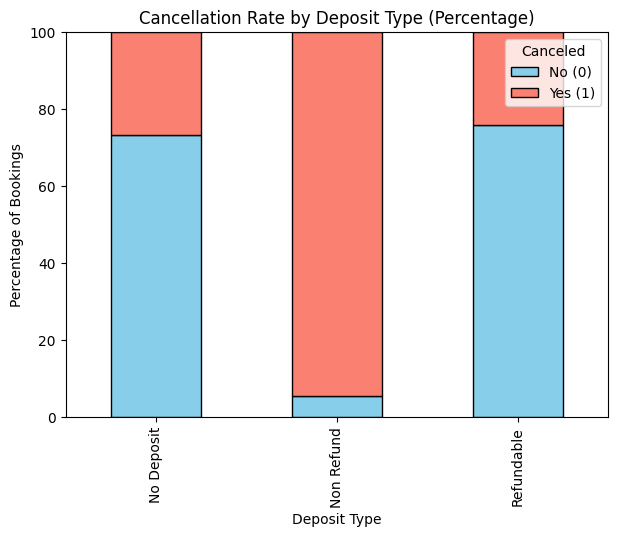

In [132]:
# group and normalize to percentages
counts = df_eda.groupby(['deposit_type','is_canceled']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100  # convert to %

# stacked percentage bar chart
percentages.plot(kind='bar', stacked=True, color=['skyblue','salmon'], edgecolor='black', figsize=(7,5))

plt.title("Cancellation Rate by Deposit Type (Percentage)")
plt.xlabel("Deposit Type")
plt.ylabel("Percentage of Bookings")
plt.legend(title="Canceled", labels=['No (0)','Yes (1)'])
plt.ylim(0, 100)
plt.show()

As no deposit would dwarf other types in the bar plot, we can better see the comparison using their percentage point. An anomaly to common sense appears in the non-refund type as its cancellation rate is so much higher than the other two types, standing at more than 90% compared to no deposit and refundable that hovers around 30%.

In [133]:
df_eda.groupby('deposit_type')['is_canceled'].value_counts(normalize=True)

deposit_type  is_canceled
No Deposit    0              0.732822
              1              0.267178
Non Refund    1              0.947013
              0              0.052987
Refundable    0              0.757009
              1              0.242991
Name: proportion, dtype: float64

ADD: Explanation of Portugal's policy loophole with burner CC, implication for dataset

### 5.2 Lead Time

The duration from a customer's booking to the time of the date the booking is for can be an indication of canceling factor. For example it can be assumed that someone booking a year away might have more window of opportunities to consider cancelling their booking. It is of course still an assumption which can be dispelled in the analysis below.

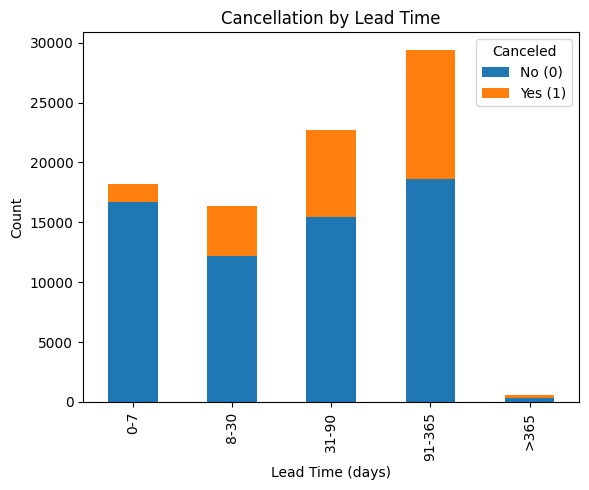

In [134]:
# Binning lead_time
bins = [-1, 7, 30, 90, 365, df_eda['lead_time'].max()]
labels = ['0-7', '8-30', '31-90', '91-365', '>365']

df_eda["lead_time_bin"] = pd.cut(df_eda["lead_time"], bins=bins, labels=labels, include_lowest=True)

# Group by lead_time_bin and is_canceled
lead_time_cancellation = df_eda.groupby(["lead_time_bin", "is_canceled"]).size().unstack(fill_value=0)

# plot stacked bar
lead_time_cancellation.plot(kind="bar", stacked=True)

plt.xlabel("Lead Time (days)")
plt.ylabel("Count")
plt.title("Cancellation by Lead Time")
plt.legend(title="Canceled", labels=['No (0)','Yes (1)'])
plt.show()

As is shown in the bar plot, a lead time somewhere less than a week has the least cancellation rate, perhaps considering the short duration between booking and stay time making the decision a sure fire one. In comparison to less than a month, less than 3 months, and within a year, the cancellation rate keep climbing along with the wider window of canceling.

### 5.3 ADR

We can assume that ADR range would have some impact to customers' relation to cancelling a booking. We can try testing that assumption by making a comparison between customers who cancelled and didn't cancel, then putting it side by side to check if there's any noticable difference.

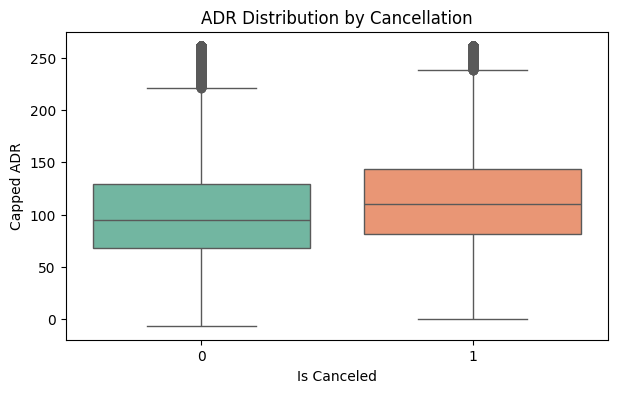

In [135]:
cap = df_eda['adr'].quantile(0.99)
df_eda['adr_capped'] = df_eda['adr'].clip(upper=cap)

plt.figure(figsize=(7,4))
sns.boxplot(x='is_canceled', y='adr_capped', data=df_eda, palette='Set2')
plt.title('ADR Distribution by Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Capped ADR')
plt.show()

As can be seen in the boxx plot above, there are no noticeable difference between the two group. They even have significant overlapping at around USD 100 ADR level, the canceling group slightly ahead. What might need further analysis are the outliers that can be seen crowding the end point of the plot, making it rather important for a more decisive conclusion.

### 5.4 Arrival Date and Seasonal Analysis

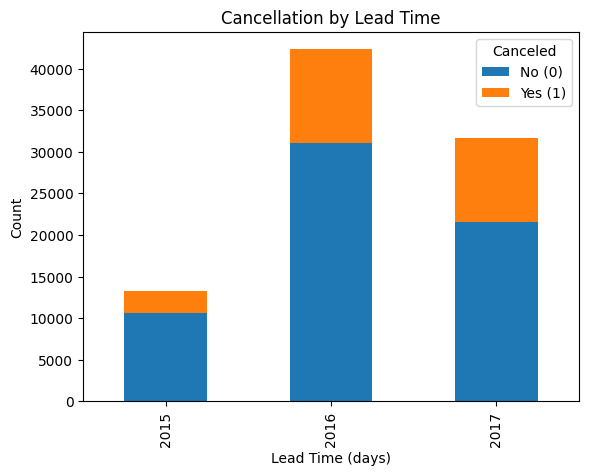

In [147]:
# Group by lead_time_bin and is_canceled, then plot
cancel_by_year = df_eda.groupby(["arrival_date_year", "is_canceled"]).size().unstack(fill_value=0)
cancel_by_year.plot(kind="bar", stacked=True)

plt.xlabel("Lead Time (days)")
plt.ylabel("Count")
plt.title("Cancellation by Lead Time")
plt.legend(title="Canceled", labels=['No (0)','Yes (1)'])
plt.show()

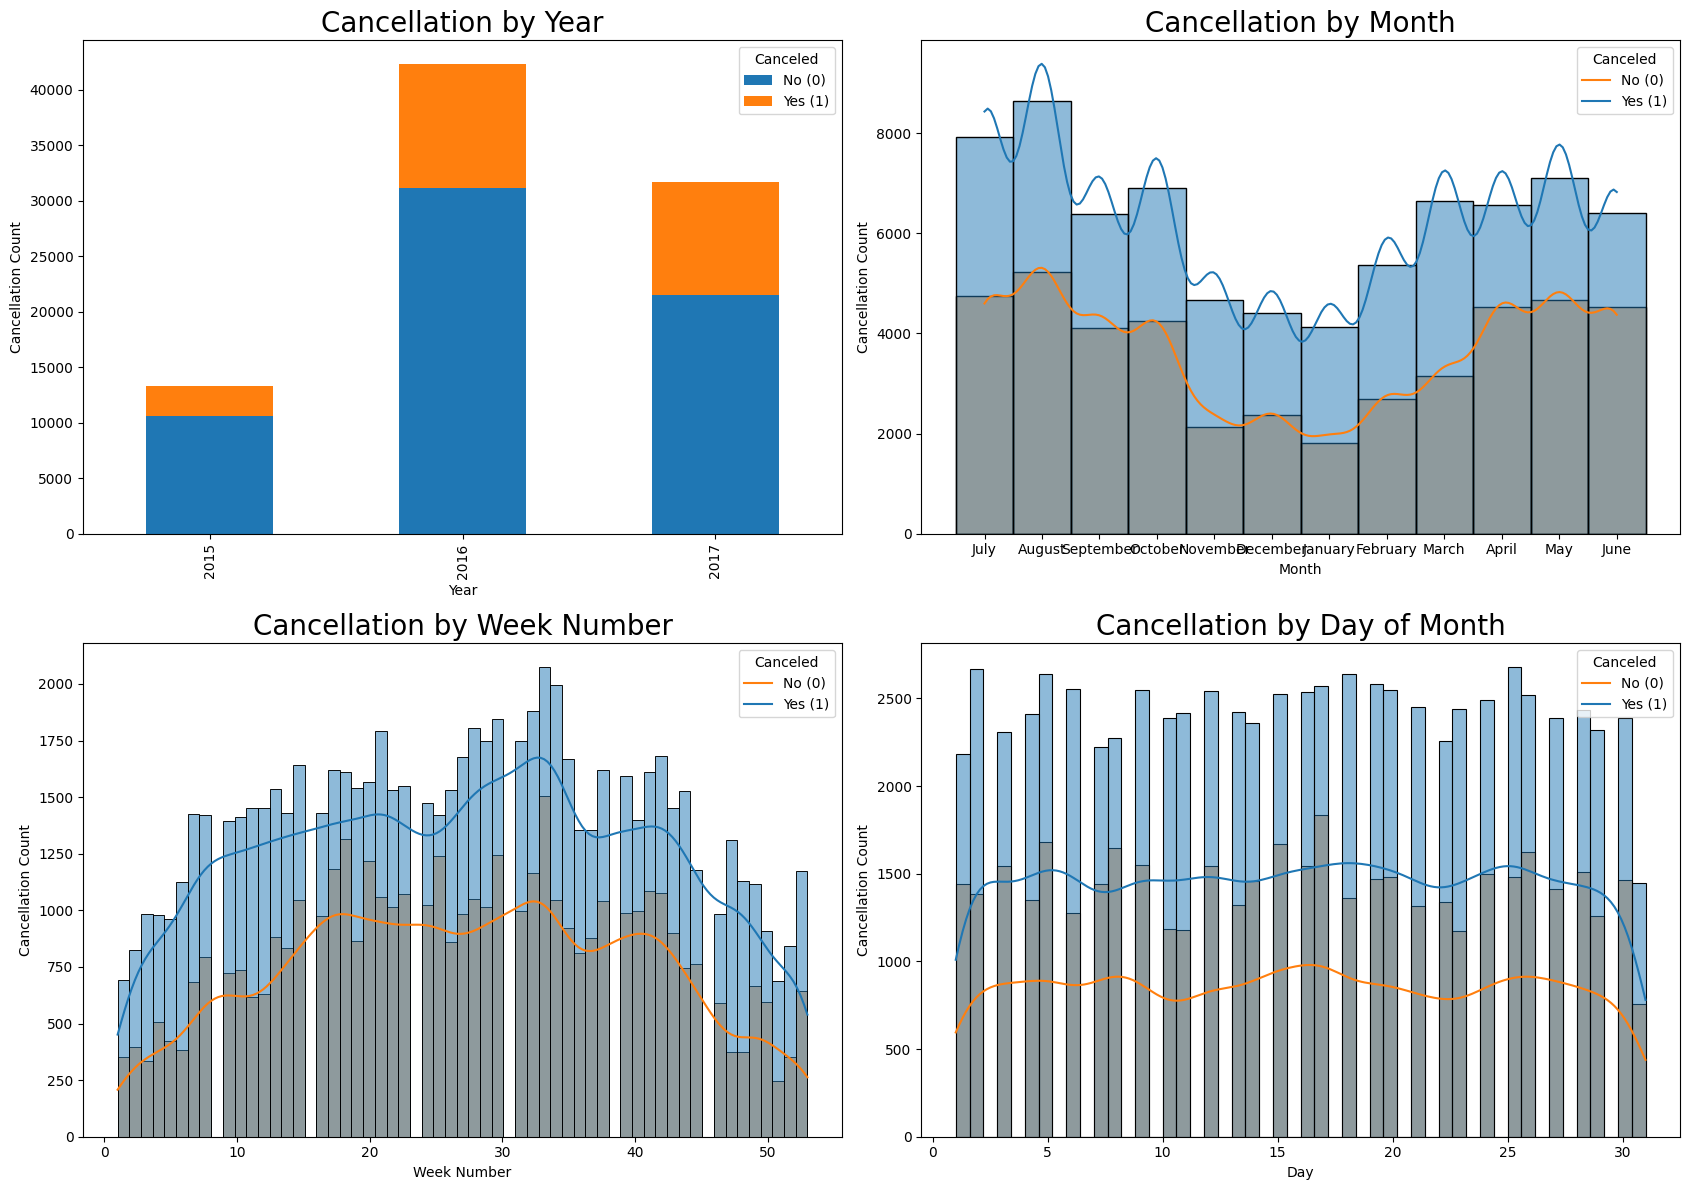

In [ ]:
# Group by lead_time_bin and is_canceled, then plot
cancel_by_year = df_eda.groupby(["arrival_date_year", "is_canceled"]).size().unstack(fill_value=0)

# Make figure (modified wow)
fig, axes = plt.subplots(2, 2, figsize=(17, 12))

# Barplot of Year
cancel_by_year.plot(kind="bar", stacked=True, ax=axes[0,0])
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Cancellation Count')
axes[0,0].set_title('Cancellation by Year', fontsize=20)
axes[0,0].legend(title="Canceled", labels=['No (0)','Yes (1)'])

# Histogram month
sns.histplot(data=df, x='arrival_date_month', hue='is_canceled', kde=True, ax=axes[0,1])
axes[0,1].set_title('Cancellation by Month', fontsize=20)
axes[0,1].legend(title="Canceled", labels=['No (0)','Yes (1)'])
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Cancellation Count')

# Histogram week number
sns.histplot(data=df, x='arrival_date_week_number', hue='is_canceled', kde=True, ax=axes[1,0])
axes[1,0].set_title('Cancellation by Week Number', fontsize=20)
axes[1,0].legend(title="Canceled", labels=['No (0)','Yes (1)'])
axes[1,0].set_xlabel('Week Number')
axes[1,0].set_ylabel('Cancellation Count')

# Histogram day of month
sns.histplot(data=df, x='arrival_date_day_of_month', hue='is_canceled', kde=True, ax=axes[1,1])
axes[1,1].set_title('Cancellation by Day of Month', fontsize=20)
axes[1,1].legend(title="Canceled", labels=['No (0)','Yes (1)'])
axes[1,1].set_xlabel('Day')
axes[1,1].set_ylabel('Cancellation Count')

plt.tight_layout()
plt.show()

# Section 6: Data Preparation And Feature Engineering

## 6.1 Initialization

### 6.1.1 Define Feature and Target

### 6.1.2 Create Custome Transformer

## 6.2 Feature Engineering Setup

## 6.3 Feature Engineering Overview

# Section 7: Model Development

## 7.1 Initialization

## 7.2 Pipeline Setup

## 7.3 Model Benchmarking
Select best model based on cross-validation result

### Experiment 1. Select Best Preprocessor

### Experiment 2. Try with Resampling

## 7.4 Tunning Model

#### 7.4.1 Model Before Tunning (Baseline with undersampling)

#### 7.4.2 Searching Best Parameters (Hyperparameter Tunning) #1

#### 7.4.2 Searching Best Parameters (Hyperparameter Tunning) #2

#### Before vs After Tunning

## 7.5 Model Analysis

### 7.5.1 Evaluate on Testing Model

### 7.5.2 Residual Analysis

### 7.5.3 Learning Curve Inspection

## 7.6 Model Explanation and Interpretation

### 7.6.1 Explanation using Feature Importances

### 7.6.2 Explanation using SHAP Values 

### 7.6.3 Explanation using Surrogate Models

# Section 8: Model Deployment

---
---
# OUT OF SECTIONS
-- Test Site --

---
---

In [136]:
# Cek jumlah total duplikat
print("Total duplicate rows:", df.duplicated().sum())

# Ambil semua duplikat
duplicated_rows = df[df.duplicated(keep=False)]

# 1. Distribusi duplikat berdasarkan hotel type
print("\nDuplicate distribution by hotel:")
print(duplicated_rows['hotel'].value_counts(normalize=True) * 100)

# 2. Distribusi duplikat berdasarkan market_segment
print("\nDuplicate distribution by market_segment:")
print(duplicated_rows['market_segment'].value_counts(normalize=True) * 100)

# 3. Distribusi duplikat berdasarkan deposit_type
print("\nDuplicate distribution by deposit_type:")
print(duplicated_rows['deposit_type'].value_counts(normalize=True) * 100)

# 4. Distribusi duplikat berdasarkan lead_time (statistical summary)
print("\nDuplicate distribution - lead_time summary:")
print(duplicated_rows['lead_time'].describe())

# 5. Distribusi duplikat berdasarkan reservation_status
print("\nDuplicate distribution by reservation_status:")
print(duplicated_rows['reservation_status'].value_counts(normalize=True) * 100)


Total duplicate rows: 31994

Duplicate distribution by hotel:
hotel
City Hotel      79.043944
Resort Hotel    20.956056
Name: proportion, dtype: float64

Duplicate distribution by market_segment:
market_segment
Groups           41.610855
Offline TA/TO    30.399602
Online TA        20.587576
Corporate         3.669862
Direct            3.498070
Complementary     0.186730
Aviation          0.047305
Name: proportion, dtype: float64

Duplicate distribution by deposit_type:
deposit_type
No Deposit    64.167808
Non Refund    35.642973
Refundable     0.189219
Name: proportion, dtype: float64

Duplicate distribution - lead_time summary:
count    40165.000000
mean       160.081912
std        126.463447
min          0.000000
25%         56.000000
50%        133.000000
75%        251.000000
max        629.000000
Name: lead_time, dtype: float64

Duplicate distribution by reservation_status:
reservation_status
Canceled     57.714428
Check-Out    41.613345
No-Show       0.672227
Name: proportion, dt

In [137]:
df[df.duplicated(keep=False)]

hotel  is_canceled  lead_time  arrival_date_year  \
4       Resort Hotel            0         14               2015   
5       Resort Hotel            0         14               2015   
21      Resort Hotel            0         72               2015   
22      Resort Hotel            0         72               2015   
39      Resort Hotel            0         70               2015   
...              ...          ...        ...                ...   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119372    City Hotel            0        175               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number  \
4                    July                        27   
5                    July                        27   
21                   July                        27   
22                   July                        27   
39                   July                        27   
...                   ...                       ...   
119352             August                        35   
119353             August                        35   
119354             August                        35   
119372             August                        35   
119373             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
4                               1                        0   
5                               1                        0   
21                              1                        2   
22                              1                        2   
39                              2                        2   
...                           ...                      ...   
119352                         31                        0   
119353                         31                        0   
119354                         31                        0   
119372                         31                        1   
119373                         31                        1   

        stays_in_week_nights  adults  children  babies meal country  \
4                          2       2       0.0       0   BB     GBR   
5                          2       2       0.0       0   BB     GBR   
21                         4       2       0.0       0   BB     PRT   
22                         4       2       0.0       0   BB     PRT   
39                         3       2       0.0       0   HB     ROU   
...                      ...     ...       ...     ...  ...     ...   
119352                     3       3       0.0       0   BB     SWE   
119353                     3       3       0.0       0   BB     SWE   
119354                     3       3       0.0       0   BB     SWE   
119372                     3       1       0.0       0   BB     NLD   
119373                     3       1       0.0       0   BB     NLD   

       market_segment distribution_channel  is_repeated_guest  \
4           Online TA                TA/TO                  0   
5           Online TA                TA/TO                  0   
21             Direct               Direct                  0   
22             Direct               Direct                  0   
39             Direct               Direct                  0   
...               ...                  ...                ...   
119352      Online TA                TA/TO                  0   
119353      Online TA                TA/TO                  0   
119354      Online TA                TA/TO                  0   
119372  Offline TA/TO                TA/TO                  0   
119373  Offline TA/TO                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
4                            0                               0   
5                            0        

In [138]:
df["adr"].mean()

101.83112153446686

In [139]:
# Pivot table ADR untuk perbandingan langsung
pivot_adr = pd.pivot_table(
    df,
    values='adr',
    index='reserved_room_type',
    columns='hotel',
    aggfunc='mean'
).round(2)

print(pivot_adr)


hotel               City Hotel  Resort Hotel
reserved_room_type                          
A                        96.25         76.21
B                        90.32        104.67
C                        85.48        161.36
D                       131.46        103.62
E                       156.80        114.49
F                       189.26        132.76
G                       201.80        168.24
H                          NaN        188.22
L                          NaN        124.67
P                         0.00          0.00


In [140]:
# mencari jumlah cancel dan tidak berdasarkan deposit_type
df.groupby(['deposit_type', 'is_canceled']).size()

deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    0                 93
              1              14494
Refundable    0                126
              1                 36
dtype: int64

In [141]:
df[df['reserved_room_type']=='P']

hotel  is_canceled  lead_time  arrival_date_year  \
4127   Resort Hotel            1          0               2016   
9376   Resort Hotel            1          0               2016   
60651    City Hotel            1          0               2016   
61244    City Hotel            1          0               2016   
61245    City Hotel            1          0               2016   
61249    City Hotel            1          0               2016   
65907    City Hotel            1          0               2017   
65908    City Hotel            1          0               2017   
65909    City Hotel            1          0               2017   
65910    City Hotel            1          0               2017   
72967    City Hotel            1          0               2017   
72968    City Hotel            1          0               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
4127            February                         8                         15   
9376            November                        48                         21   
60651           November                        47                         17   
61244           December                        50                          6   
61245           December                        50                          6   
61249           December                        50                          6   
65907              April                        15                         10   
65908              April                        15                         10   
65909              April                        15                         10   
65910              April                        15                         10   
72967             August                        32                         11   
72968             August                        32                         11   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
4127                         0                     0       0       0.0   
9376                         0                     0       0       0.0   
60651                        4                    11       0       0.0   
61244                        0                     0       0       0.0   
61245                        0                     0       0       0.0   
61249                        0                     0       0       0.0   
65907                        0                     0       0       0.0   
65908                        0                     0       0       0.0   
65909                        0                     0       0       0.0   
65910                        0                     0       0       0.0   
72967                        0                     0       0       0.0   
72968                        0                     0       0       0.0   

       babies meal country market_segment distribution_channel  \
4127        0   SC     NaN  Offline TA/TO                TA/TO   
9376        0   SC     NaN  Offline TA/TO                TA/TO   
60651       0   SC     NaN      Corporate               Direct   
61244       0   SC     NaN  Complementary            Corporate   
61245       0   SC     NaN  Complementary            Corporate   
61249       0   SC     NaN  Complementary            Corporate   
65907       0   SC     NaN  Complementary            Corporate   
65908       0   SC     NaN  Complementary            Corporate   
65909       0   SC     NaN  Complementary            Corporate   
65910       0   SC     NaN  Complementary            Corporate   
72967       0   SC     PRT      Online TA                TA/TO   
72968       0   SC     PRT      Online TA                TA/TO   

       is_repeated_guest  previous_cancellations  \
4127                   0                       0   
9376                   0                       0   
60651                  0                       0   
61244                  0                       0   
61245              